In [2]:
# pip install pandas
# pip install numpy
# pip install datetime
# pip install seaborn
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [6]:
from google.colab import files
import io
uploaded = files.upload()

Saving tourism_with_id.csv to tourism_with_id.csv


In [4]:
# table 1.1
df_tourism_rating = pd.read_csv('tourism_rating.csv', header=0)
df_tourism_rating

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [7]:
# table 1.2
df_user = pd.read_csv('user.csv', header=0)
df_user

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20
...,...,...,...
295,296,"Lampung, Sumatera Selatan",31
296,297,"Palembang, Sumatera Selatan",39
297,298,"Bogor, Jawa Barat",38
298,299,"Sragen, Jawa Tengah",27


In [8]:
# table 1.3
df_tourism_with_id = pd.read_csv('tourism_with_id.csv', header=0)
df_tourism_with_id

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,NaN,433
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,NaN,434
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,NaN,435
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,NaN,436


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


##Exploratory Data Analysis (EDA)

In [9]:
# Combining 3 tables
merger = pd.merge(df_tourism_rating, df_user, how='inner', on='User_Id')
final_merger = pd.merge(merger, df_tourism_with_id, how='inner', on='Place_Id')
final_merger.iloc[:5]

,User_Id,Place_Id,Place_Ratings,Location,Age,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,179,3,"Semarang, Jawa Tengah",20,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416,NaN,179
1,22,179,4,"Subang, Jawa Barat",25,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416,NaN,179
2,40,179,3,"Semarang, Jawa Tengah",27,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416,NaN,179
3,49,179,5,"Jakarta Pusat, DKI Jakarta",24,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416,NaN,179
4,74,179,3,"Semarang, Jawa Tengah",30,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416,NaN,179


In [ ]:
final_merger.to_csv('TourismDestination.csv', index=False)

In [ ]:
final_merger.info()

In [ ]:
categoricals = ['Location',  'Place_Name', 'Category', 'City']
numericals = ['User_Id', 'Place_Id','Place_Ratings', 'Age', 'Price', 'Rating', 'Time_Minutes']

In [ ]:
final_merger[numericals].describe()

,User_Id,Place_Id,Place_Ratings,Age,Price,Rating,Time_Minutes
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,4628.000000
mean,151.292700,219.416400,3.066500,28.726200,23725.500000,4.445700,83.291919
std,86.137374,126.228335,1.379952,6.355004,62633.550481,0.207345,51.954188
min,1.000000,1.000000,1.000000,18.000000,0.000000,3.400000,10.000000
25%,77.000000,108.750000,2.000000,24.000000,0.000000,4.400000,45.000000
50%,151.000000,220.000000,3.000000,29.000000,5000.000000,4.500000,60.000000
75%,226.000000,329.000000,4.000000,34.000000,20000.000000,4.600000,120.000000
max,300.000000,437.000000,5.000000,40.000000,900000.000000,5.000000,360.000000


In [ ]:
final_merger[categoricals].describe()

,Location,Place_Name,Category,City
count,10000,10000,10000,10000
unique,28,437,6,5
top,"Bekasi, Jawa Barat",Pantai Parangtritis,Taman Hiburan,Yogyakarta
freq,1255,39,3053,2871


In [ ]:
user_count_by_location = final_merger.groupby('Location')['User_Id'].nunique().reset_index()
user_count_by_location_sorted = user_count_by_location.sort_values(by='User_Id', ascending=False)
user_count_by_location_sorted

,Location,User_Id
1,"Bekasi, Jawa Barat",39
20,"Semarang, Jawa Tengah",22
14,"Lampung, Sumatera Selatan",20
27,"Yogyakarta, DIY",20
2,"Bogor, Jawa Barat",17
4,"Cirebon, Jawa Barat",14
8,"Jakarta Selatan, DKI Jakarta",14
24,"Subang, Jawa Barat",14
5,"Depok, Jawa Barat",12
18,"Ponorogo, Jawa Timur",11


###Total visits to each city by category

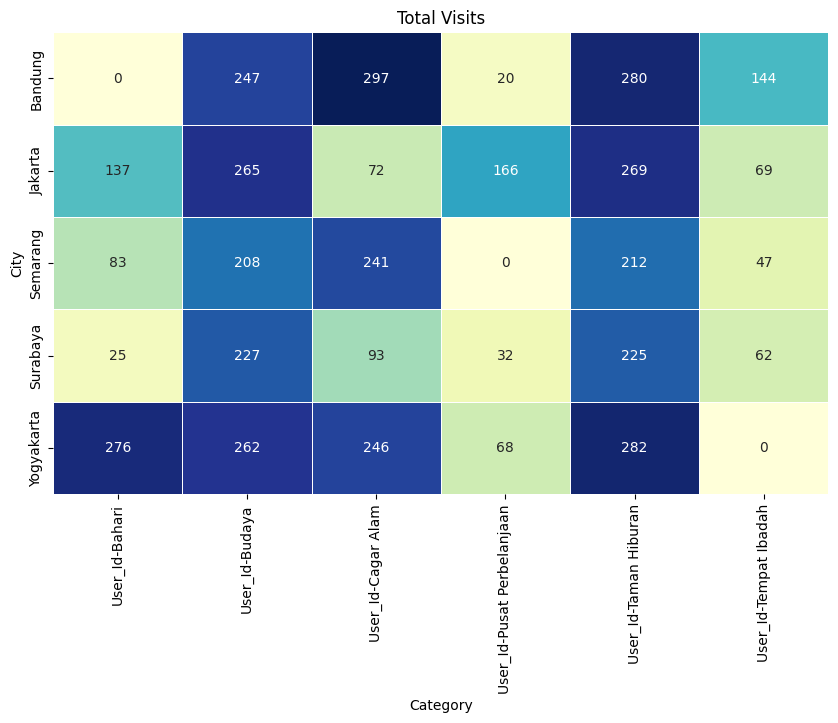

In [ ]:
df_total_visits = pd.pivot_table(final_merger, index='City',
               columns='Category', values=['User_Id'],
               aggfunc={'User_Id': pd.Series.nunique},
               fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_total_visits, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5, cbar=False)

plt.title("Total Visits")
plt.xlabel("Category")
plt.ylabel("City")

plt.show()

In [ ]:
user_count_by_cityandcategory = final_merger.groupby(['City', 'Category'])['User_Id'].nunique().reset_index()
user_count_by_cityandcategory_sorted = user_count_by_cityandcategory.sort_values(by='User_Id', ascending=False)
user_count_by_cityandcategory_sorted

,City,Category,User_Id
1,Bandung,Cagar Alam,297
26,Yogyakarta,Taman Hiburan,282
3,Bandung,Taman Hiburan,280
22,Yogyakarta,Bahari,276
9,Jakarta,Taman Hiburan,269
6,Jakarta,Budaya,265
23,Yogyakarta,Budaya,262
0,Bandung,Budaya,247
24,Yogyakarta,Cagar Alam,246
13,Semarang,Cagar Alam,241


###Rating to each city by category

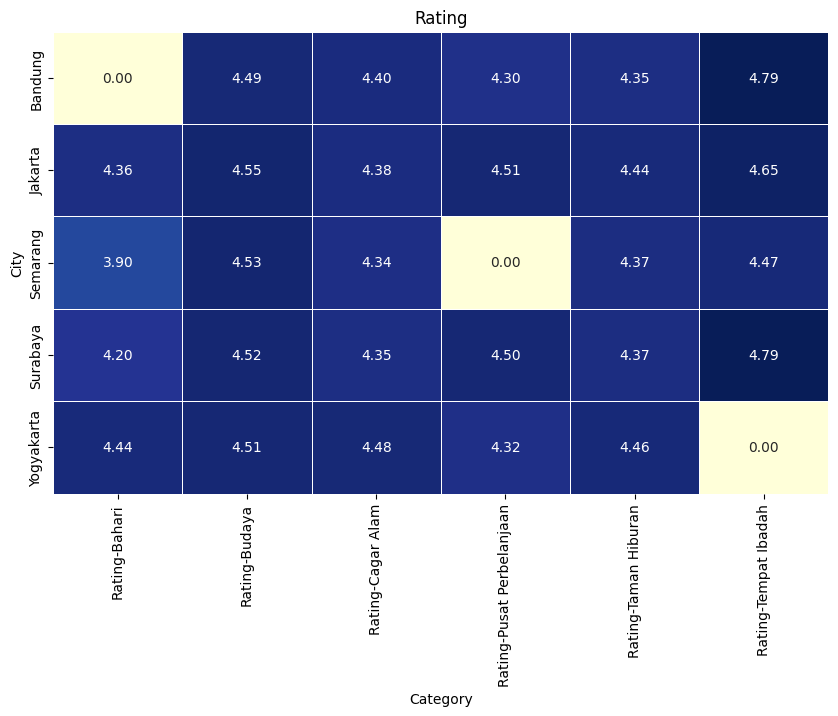

In [ ]:
df_AVG_Rating = pd.pivot_table(final_merger, index='City',
               columns='Category', values=['Rating'],
               aggfunc={'Rating': 'mean'},
               fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_AVG_Rating, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, cbar=False)

plt.title("Rating")
plt.xlabel("Category")
plt.ylabel("City")

plt.show()

In [ ]:
average_rating_by_city = final_merger.groupby(['City', 'Category'])['Rating'].mean().reset_index()
average_rating_by_city

,City,Category,Rating
0,Bandung,Budaya,4.490019
1,Bandung,Cagar Alam,4.403062
2,Bandung,Pusat Perbelanjaan,4.300000
3,Bandung,Taman Hiburan,4.349770
4,Bandung,Tempat Ibadah,4.787293
5,Jakarta,Bahari,4.359524
6,Jakarta,Budaya,4.553444
7,Jakarta,Cagar Alam,4.382895
8,Jakarta,Pusat Perbelanjaan,4.506693
9,Jakarta,Taman Hiburan,4.442258


###Comparison of Total visits by Age for Each City

<ipython-input-26-b51e05b4e2c2>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Age', y='User_Id', hue='City', data=final_merger, estimator=sum, ci=None)


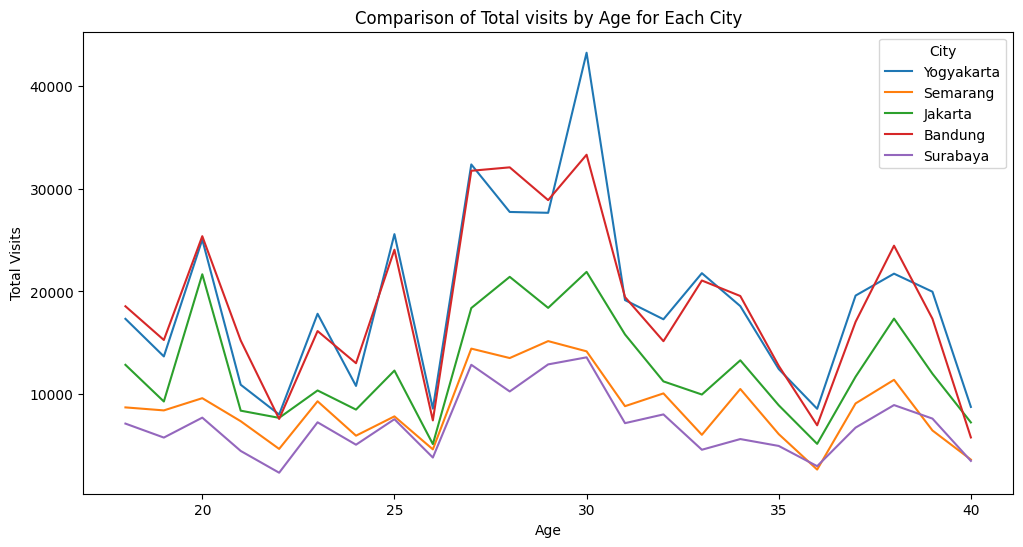

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='User_Id', hue='City', data=final_merger, estimator=sum, ci=None)

plt.title('Comparison of Total visits by Age for Each City')
plt.xlabel('Age')
plt.ylabel('Total Visits')
plt.show()

In [31]:
from pydoc import describe
average_Age_by_city = final_merger.groupby(['City', 'Age'])['User_Id'].sum().reset_index()
average_Age_by_city_sort = average_Age_by_city.sort_values(by='User_Id', ascending=True)
average_Age_by_city_sort.iloc[:20]

,City,Age,User_Id
73,Surabaya,22,2341
64,Semarang,36,2647
87,Surabaya,36,2979
91,Surabaya,40,3491
68,Semarang,40,3617
77,Surabaya,26,3819
72,Surabaya,21,4462
84,Surabaya,33,4579
54,Semarang,26,4617
50,Semarang,22,4660
